Import delle librerie necessarie

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **ANALISI ESAPLORATIVA**

In [99]:
path = '../Data/final_data/province.csv'
df = pd.read_csv(path)

display(df)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance
0,Abruzzo,HOTELLIKE,Italia,2008-01-01,88624,257703
1,Abruzzo,HOTELLIKE,Paesi esteri,2008-01-01,5346,19124
2,Abruzzo,OTHER,Italia,2008-01-01,5701,20039
3,Abruzzo,OTHER,Paesi esteri,2008-01-01,202,2600
4,Chieti,HOTELLIKE,Italia,2008-01-01,13790,37455
...,...,...,...,...,...,...
3355,Pescara,OTHER,Paesi esteri,2021-12-01,145,409
3356,Teramo,HOTELLIKE,Italia,2021-12-01,7582,19674
3357,Teramo,HOTELLIKE,Paesi esteri,2021-12-01,410,1761
3358,Teramo,OTHER,Italia,2021-12-01,1333,4437


In [100]:
def make_mask(df:pd.DataFrame, region:str, infrastructure:str, residence:str):
    df = df[(df['Region'] == region) & (df['Infrastructure'] == infrastructure) & (df['ResidenceCountry']==residence)]
    return df

In [101]:
mask_abr_hotel_ita = make_mask(df, 'Abruzzo', 'HOTELLIKE', 'Italia')
mask_abr_hotel_ext = make_mask(df, 'Abruzzo', 'HOTELLIKE', 'Paesi esteri')
mask_abr_nothotel_ita = make_mask(df, 'Abruzzo', 'OTHER', 'Italia')
mask_abr_nothotel_ext = make_mask(df, 'Abruzzo', 'OTHER', 'Paesi esteri')

mask_ter_hotel_ita = make_mask(df, 'Teramo', 'HOTELLIKE', 'Italia')
mask_ter_hotel_ext = make_mask(df, 'Teramo', 'HOTELLIKE', 'Paesi esteri')
mask_ter_nothotel_ita = make_mask(df, 'Teramo', 'OTHER', 'Italia')
mask_ter_nothotel_ext = make_mask(df, 'Teramo', 'OTHER', 'Paesi esteri')

mask_chi_hotel_ita = make_mask(df, 'Chieti', 'HOTELLIKE', 'Italia')
mask_chi_hotel_ext = make_mask(df, 'Chieti', 'HOTELLIKE', 'Paesi esteri')
mask_chi_nothotel_ita = make_mask(df, 'Chieti', 'OTHER', 'Italia')
mask_chi_nothotel_ext = make_mask(df, 'Chieti', 'OTHER', 'Paesi esteri')

mask_pes_hotel_ita = make_mask(df, 'Pescara', 'HOTELLIKE', 'Italia')
mask_pes_hotel_ext = make_mask(df, 'Pescara', 'HOTELLIKE', 'Paesi esteri')
mask_pes_nothotel_ita = make_mask(df, 'Pescara', 'OTHER', 'Italia')
mask_pes_nothotel_ext = make_mask(df, 'Pescara', 'OTHER', 'Paesi esteri')

mask_laq_hotel_ita = make_mask(df, "L'Aquila", 'HOTELLIKE', 'Italia')
mask_laq_hotel_ext = make_mask(df, "L'Aquila", 'HOTELLIKE', 'Paesi esteri')
mask_laq_nothotel_ita = make_mask(df, "L'Aquila", 'OTHER', 'Italia')
mask_laq_nothotel_ext = make_mask(df, "L'Aquila", 'OTHER', 'Paesi esteri')

In [102]:
# Classe per creare grafici a dispersione e tracciato
class Plot:
  def __init__(self, sizex:int, sizey:int):
    self.x = np.zeros(sizex)
    self.y = np.zeros(sizey)

  #label nome associato alla legenda dei dati che verranno rappresentati
  def tracciato(self, x:np.array, y:np.array, label:str, colore:str):
    self.x = x
    self.y = y
    plt.plot(self.x, self.y, label=label, color=colore)

  def dispersione(self, x:np.array, y:np.array, label:str,
                  colore:str, dimensione:np.int64, trasparenza: np.float64):
    self.x = x
    self.y = y
    plt.scatter(self.x, self.y, label=label, color=colore,
                s=dimensione, alpha=trasparenza)

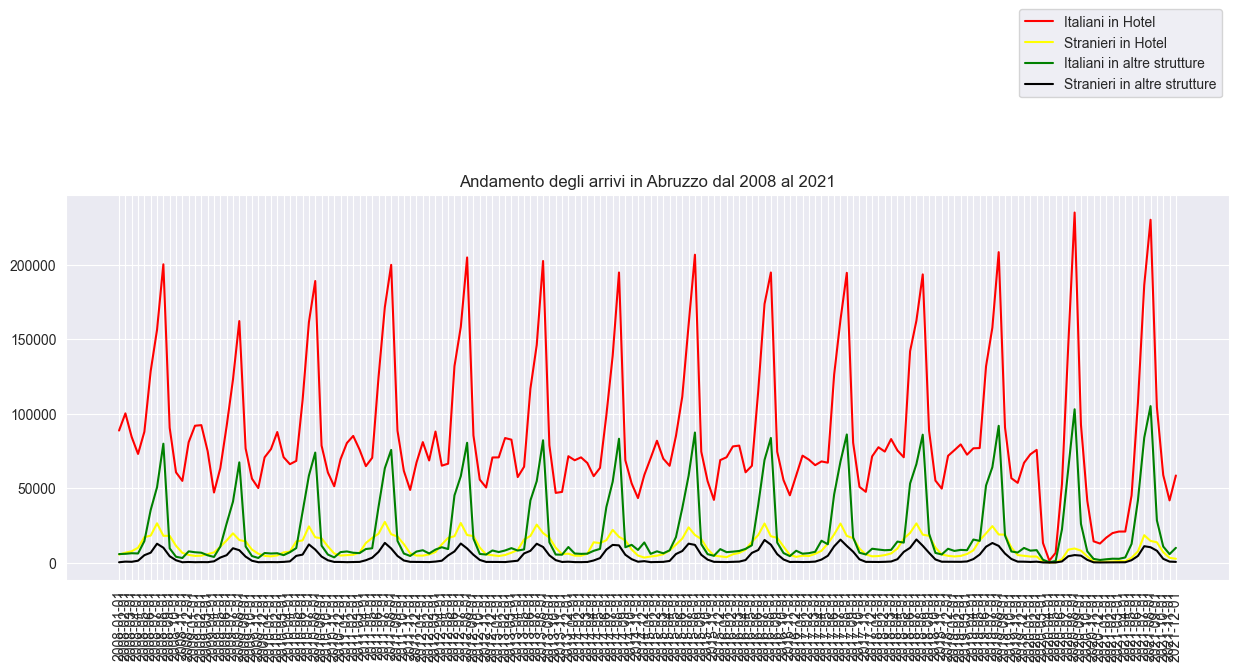

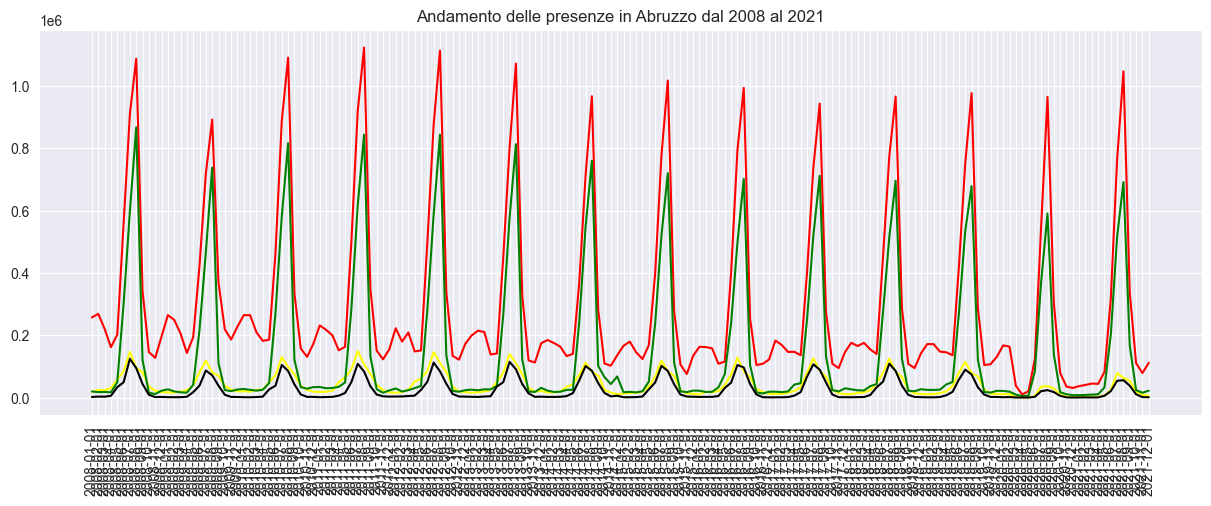

In [103]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_abruzzo = Plot(mask_abr_hotel_ita.Date.size, mask_abr_hotel_ita['Arrivals'].size)
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi in Abruzzo dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_abruzzo = Plot(mask_abr_hotel_ita.Date.size, mask_abr_hotel_ita['Attendance'].size)
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_abruzzo.tracciato(mask_abr_hotel_ita.Date, mask_abr_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze in Abruzzo dal 2008 al 2021")
plt.show()

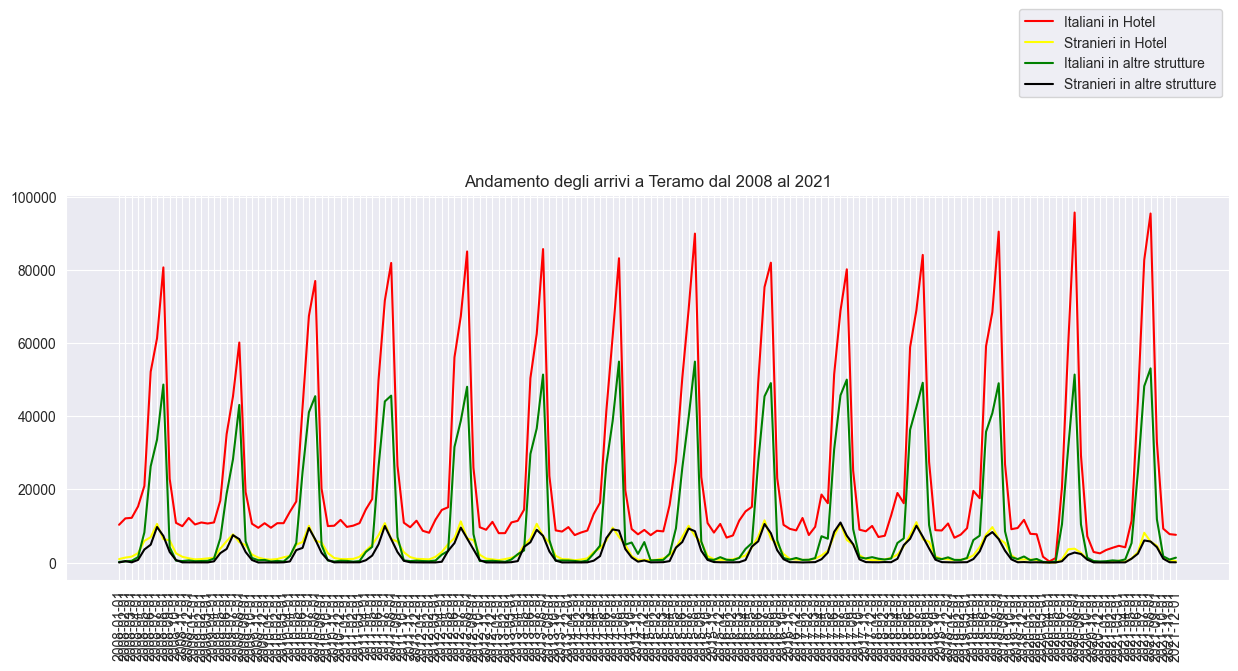

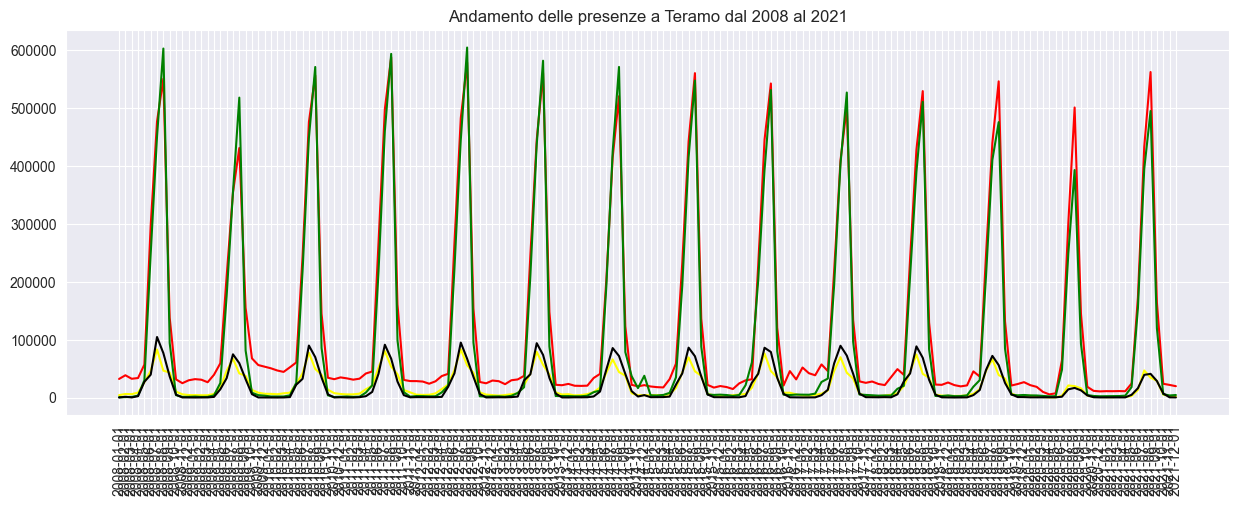

In [104]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_teramo = Plot(mask_ter_hotel_ita.Date.size, mask_ter_hotel_ita['Arrivals'].size)
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a Teramo dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_teramo = Plot(mask_ter_hotel_ita.Date.size, mask_ter_hotel_ita['Attendance'].size)
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_teramo.tracciato(mask_ter_hotel_ita.Date, mask_ter_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a Teramo dal 2008 al 2021")
plt.show()

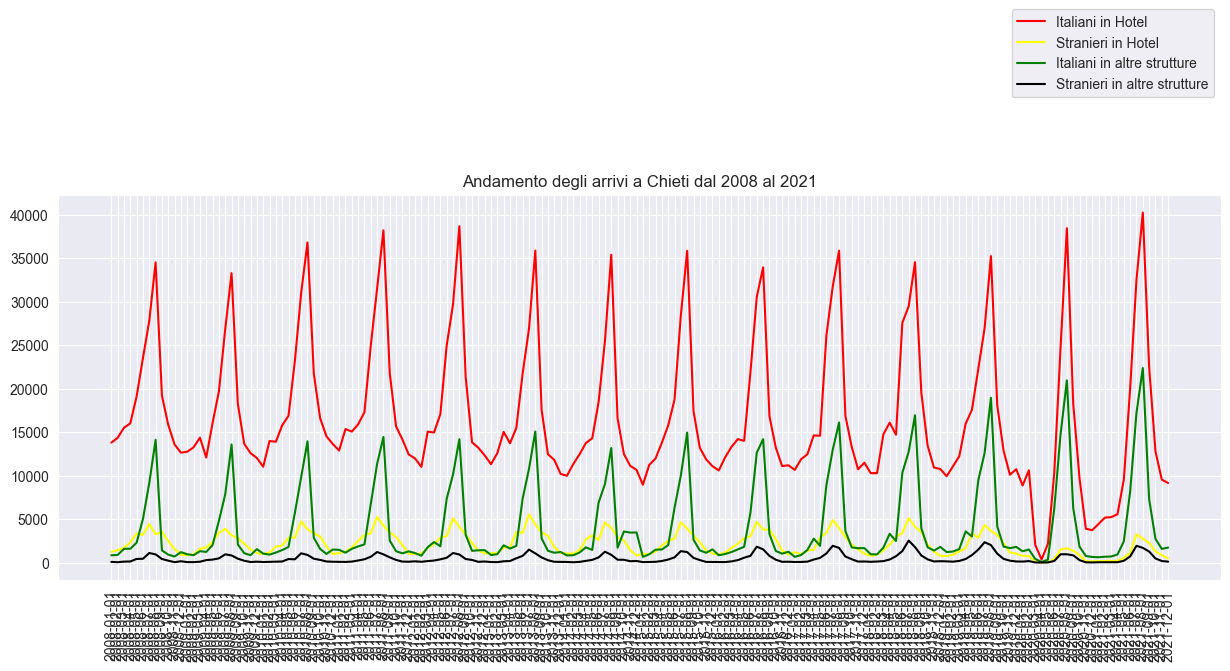

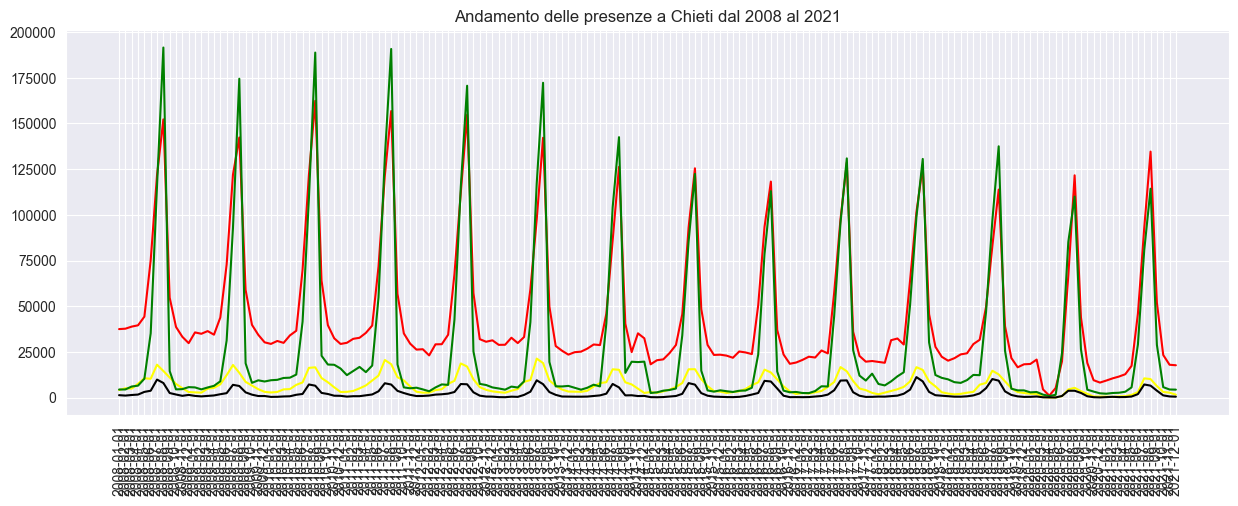

In [105]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_chieti = Plot(mask_chi_hotel_ita.Date.size, mask_chi_hotel_ita['Arrivals'].size)
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a Chieti dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_chieti = Plot(mask_chi_hotel_ita.Date.size, mask_chi_hotel_ita['Attendance'].size)
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_chieti.tracciato(mask_chi_hotel_ita.Date, mask_chi_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a Chieti dal 2008 al 2021")
plt.show()

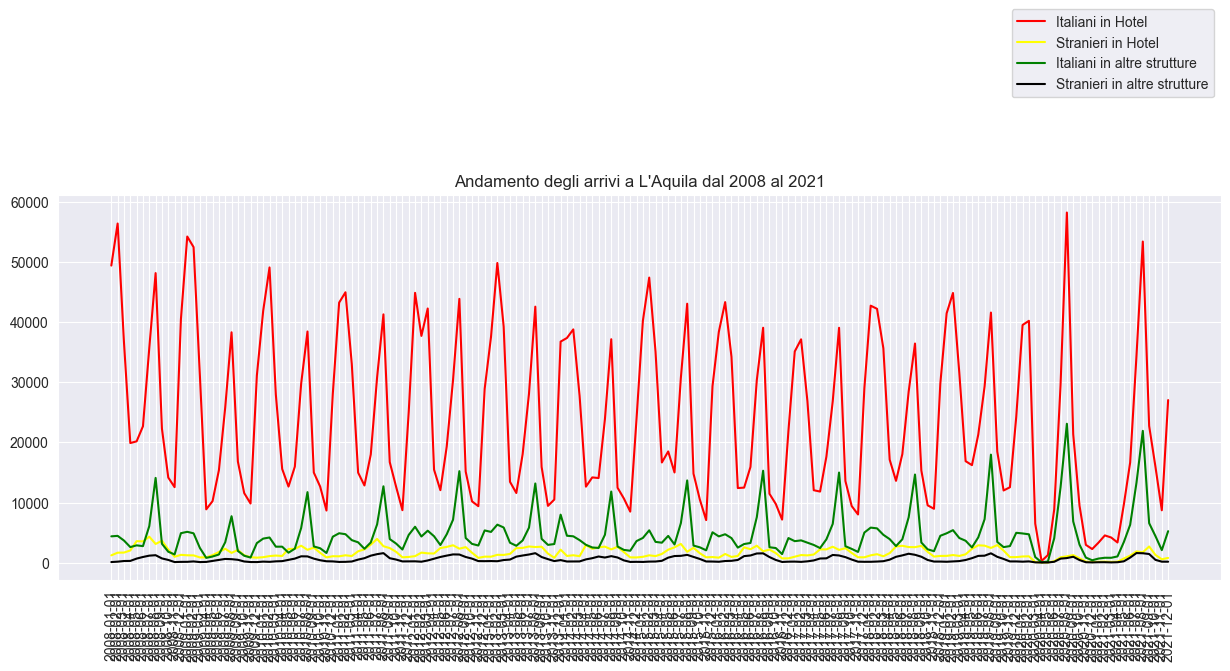

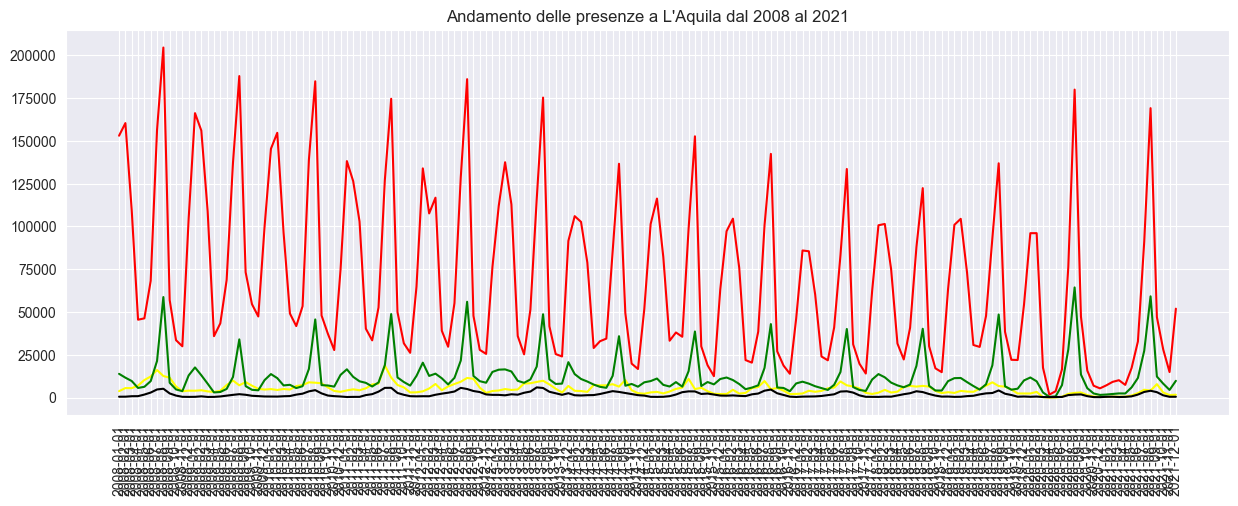

In [106]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_aquila = Plot(mask_laq_hotel_ita.Date.size, mask_laq_hotel_ita['Arrivals'].size)
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a L'Aquila dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_aquila = Plot(mask_laq_hotel_ita.Date.size, mask_laq_hotel_ita['Attendance'].size)
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_aquila.tracciato(mask_laq_hotel_ita.Date, mask_laq_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a L'Aquila dal 2008 al 2021")
plt.show()

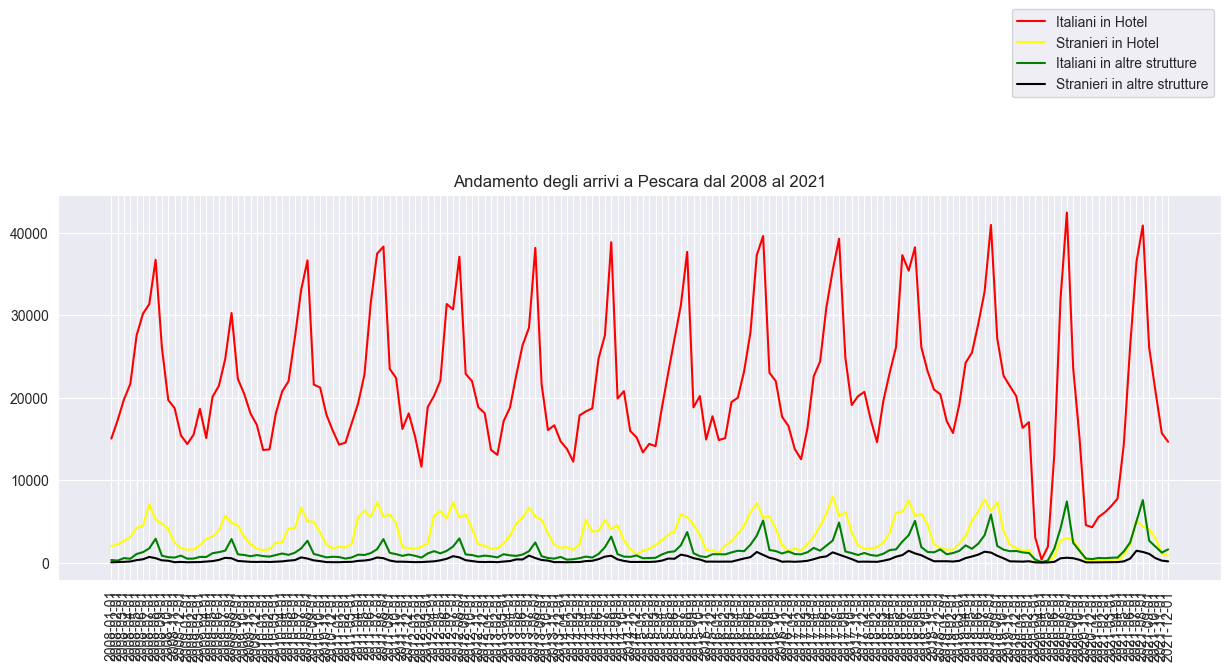

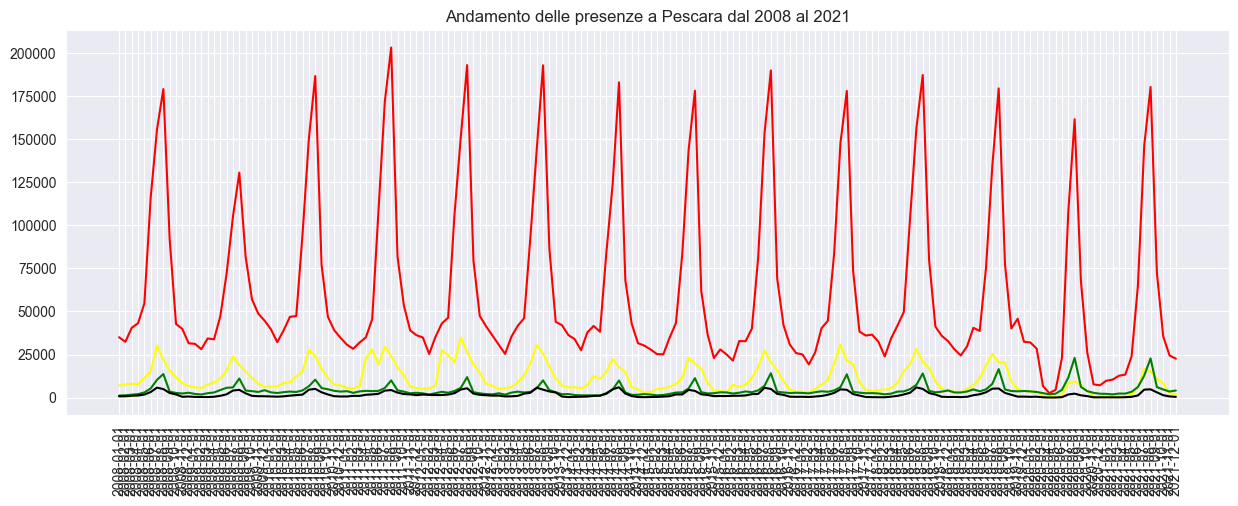

In [107]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_pescara = Plot(mask_pes_hotel_ita.Date.size, mask_pes_hotel_ita['Arrivals'].size)
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ext['Arrivals'], "Stranieri in Hotel", "yellow")
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ita['Arrivals'], "Italiani in altre strutture", "green")
arrivals_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ext['Arrivals'], "Stranieri in altre strutture", "black")
plt.title("Andamento degli arrivi a Pescara dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
attendance_pescara = Plot(mask_pes_hotel_ita.Date.size, mask_pes_hotel_ita['Attendance'].size)
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ita['Attendance'], "Italiani in Hotel", "red")
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_hotel_ext['Attendance'], "Stranieri in Hotel", "yellow")
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ita['Attendance'], "Italiani in altre strutture", "green")
attendance_pescara.tracciato(mask_pes_hotel_ita.Date, mask_pes_nothotel_ext['Attendance'], "Stranieri in altre strutture", "black")
plt.title("Andamento delle presenze a Pescara dal 2008 al 2021")
plt.show()